# Chatbot do Passando Recibo

In [1]:
import textwrap
import numpy as np
import pandas as pd
from dotenv import load_dotenv

import google.generativeai as genai
import google.ai.generativelanguage as glm

import os

from IPython.display import Markdown
from IPython.display import display
import ipywidgets as widgets

from PIL import Image
import io

In [2]:
load_dotenv()

genai.configure(api_key=os.getenv('GOOGLE_API_KEY'))

In [3]:
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)


models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [4]:
model_name = 'models/gemini-pro-vision'
generation_config = {
    'candidate_count': 1,
    'temperature': 0.5,
}
safety_settings={
    'HATE': 'BLOCK_NONE',
    'HARASSMENT': 'BLOCK_NONE',
    'SEXUAL' : 'BLOCK_NONE',
    'DANGEROUS' : 'BLOCK_NONE'
}

In [5]:
model = genai.GenerativeModel(
    model_name=model_name,
    generation_config=generation_config,
    safety_settings=safety_settings,
)
model

genai.GenerativeModel(
    model_name='models/gemini-pro-vision',
    generation_config={'candidate_count': 1, 'temperature': 0.5},
    safety_settings={<HarmCategory.HARM_CATEGORY_HATE_SPEECH: 8>: <HarmBlockThreshold.BLOCK_NONE: 4>, <HarmCategory.HARM_CATEGORY_HARASSMENT: 7>: <HarmBlockThreshold.BLOCK_NONE: 4>, <HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: 9>: <HarmBlockThreshold.BLOCK_NONE: 4>, <HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: 10>: <HarmBlockThreshold.BLOCK_NONE: 4>},
    tools=None,
    system_instruction=None,
)

## Chat

1. Indique onde estão os recibos
2. Faça perguntas sobre eles

In [6]:
def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [7]:
uploader = widgets.FileUpload(
    accept='image/*',
    multiple=True
)
display(uploader)

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

#### Carrega as imagens (mostramos apenas a primeira!)

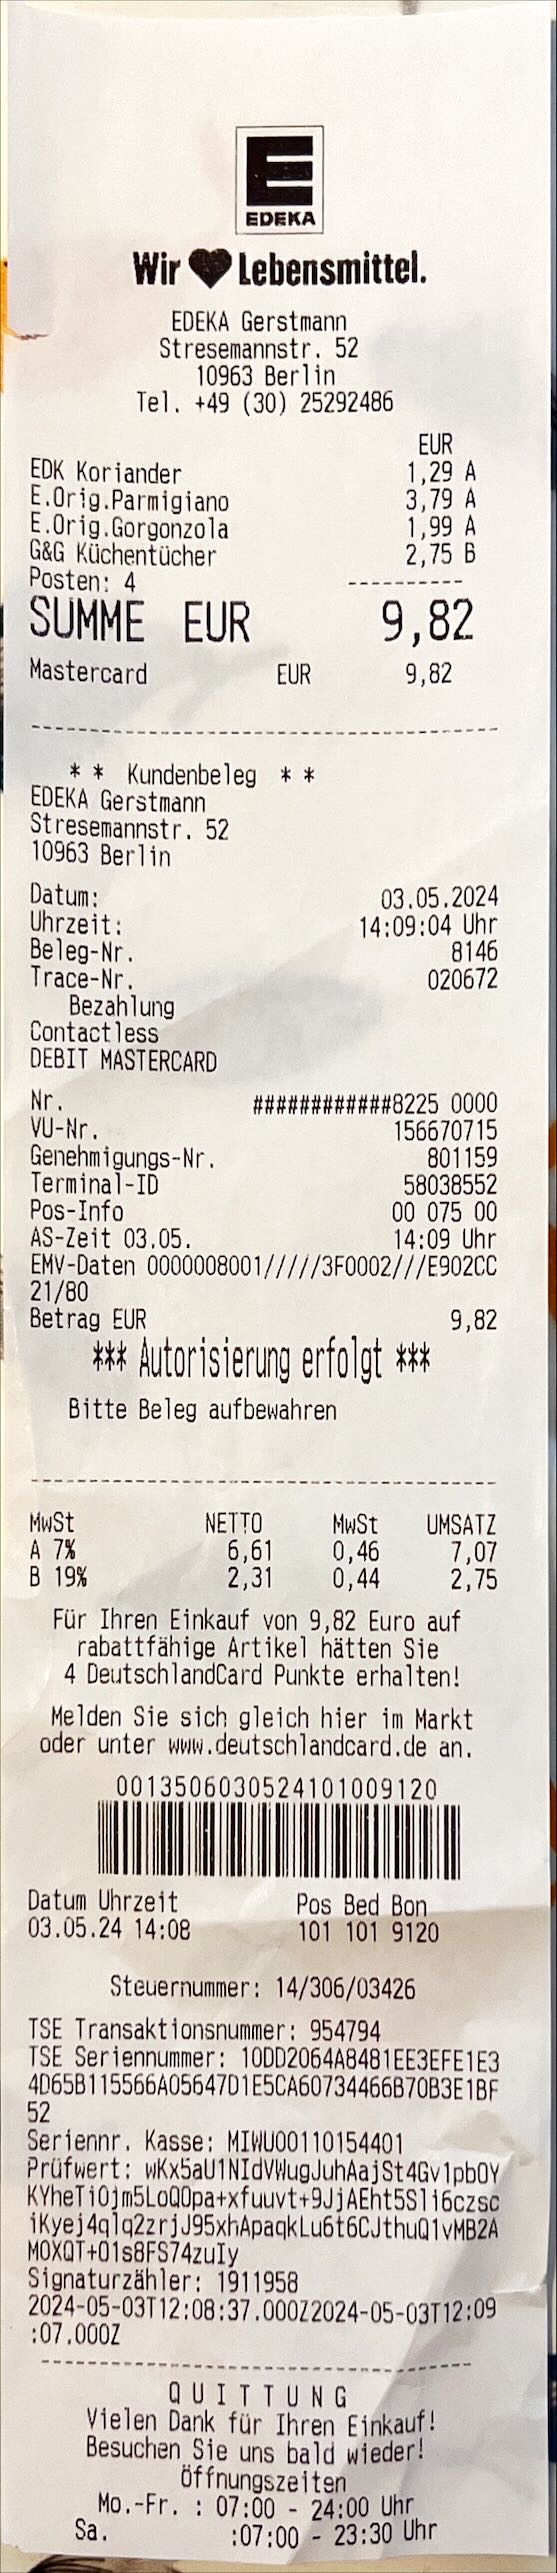

In [8]:
images = [Image.open(io.BytesIO(value.content.tobytes())) for value in uploader.value]
images[0]

In [10]:
len(images)

2

In [11]:
instructions = [
    """
    Você é um especialista em finanças domésticas que está ajudando alguém a ter uma consciência melhor sobre os gastos.
    Na primeira interação, explique o que vê, faça um sumário breve dos recibos dizendo os locais, o gasto total e os itens mais comprados.
    """
]
instructions.extend(images)
instructions 

['\n    Você é um especialista em finanças domésticas que está ajudando alguém a ter uma consciência melhor sobre os gastos.\n    Na primeira interação, explique o que vê, faça um sumário breve dos recibos dizendo os locais, o gasto total e os itens mais comprados.\n    ',
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=557x2573>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=765x2189>]

In [12]:
response = model.generate_content(instructions, stream=True)
response.resolve()
response.text

>  Você gastou um total de R$ 18,40 em duas lojas.
> Você comprou pão, macarrão, molho, queijo, presunto, iogurte, banana e refrigerante.
> A maioria das compras foi feita no supermercado Edeka, onde você gastou R$ 9,82.
> Você também comprou pão na padaria Lidl, onde gastou R$ 8,58.

In [23]:
# remove a primeira instrução
instructions = images[:]

In [ ]:
# limitatações com a criação do chat
# https://github.com/google-gemini/generative-ai-python/issues/210

In [32]:
input_message = 'Quais as suas perguntas? Digite FIM para encerrar: ' 
prompt = input(input_message)

while prompt.lower() != "fim":
    instructions.append(prompt)
    response = model.generate_content(instructions, stream=True)
    response.resolve()
    print("Resposta:", response.text, '\n\n')
    instructions = images[:]  # nova lista mas inicializada com as images
    prompt = input(input_message)


Quais as suas perguntas? Digite FIM para encerrar:  quanto gastamos no mês de maio?


Resposta:  17,47 euros. 




Quais as suas perguntas? Digite FIM para encerrar:  FIM
